In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import glob
import cv2
import numpy as np
import pandas as pd
# IMG_DIR='/content/drive/MyDrive/RC - Brain Inspired Deep Learning /Frame with plane'   # JUST NEED TO CHANE THE PATHS OF SOURCE AND DEST
IMG_DIR='/content/drive/MyDrive/RC - Brain Inspired Deep Learning /VIDEO_2/images_with_train'
def read_images(directory): 
    for img in glob.glob(directory+"/*.png"):
        # image = cv2.imread(img)     #for normal rgb image 
        image = cv2.imread(img,0)   #DP trying to convert directly to grayscale
        yield image


img_list = np.array(list(read_images(IMG_DIR)))
print(img_list.shape)

(150, 1080, 1920)


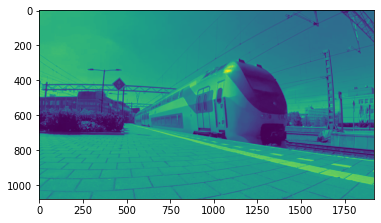

In [5]:
plt.imshow(img_list[13])

In [9]:
from keras.utils.dataset_utils import split_dataset
import math
no_of_features = 16  # 16
max_row = img_list.shape[1]
max_col = img_list.shape[2]

sqrt_num_feature = int(1)
sqrt_num_feature = math.isqrt(no_of_features) # 16 -> 4
row_split = int(max_row/sqrt_num_feature)
col_split = int(max_col/sqrt_num_feature)
print(row_split,col_split, sqrt_num_feature)
print(max_col,max_row)

270 480 4
1920 1080


In [13]:

vect = []
for i in range(img_list.shape[0]):
  i1=0
  j1 =0
  while(i1<=max_row-row_split):
    while(j1<=max_col-col_split):
      # print(i1,j1)
      p1 = i1
      p2 = j1
      summ = 0.0
      for x in range(p1,p1+row_split):
        for y in range(p2,p2+col_split):
          summ+= img_list[i][p1][p2]
      vect.append(summ)
      j1+=col_split
    j1 = 0
    i1+=row_split
  print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [ ]:

# vect = []
# for i in range(60):
#   i1=0
#   j1 =0
#   while(i1<1080):
#     while(j1<1080):
#       p1 = i1
#       p2 = j1
#       summ = 0.0
#       for x in range(p1,p1+67):
#         for y in range(p2,p2+67):
#           summ+= img_list[i][p1][p2]
#       vect.append(summ)
#       j1+=68
#     i1+=68




In [14]:
arr = np.array(vect)
print(arr.shape)

(2400,)


In [15]:
# arr_fin  = arr.reshape(60,16)
arr_fin  = arr.reshape(img_list.shape[0], no_of_features)

In [16]:
print(arr.shape, arr_fin.shape)


(2400,) (150, 16)


In [17]:
DF = pd.DataFrame(arr_fin)

In [18]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,12052800.0,10627200.0,8812800.0,6739200.0,21902400.0,19310400.0,16200000.0,13348800.0,11923200.0,2332800.0,20217600.0,20217600.0,16459200.0,19440000.0,17884800.0,17755200.0
1,12052800.0,10627200.0,8683200.0,6739200.0,21902400.0,19440000.0,16200000.0,13348800.0,11534400.0,2332800.0,20217600.0,20347200.0,16459200.0,19440000.0,18014400.0,17755200.0
2,12052800.0,10627200.0,8683200.0,6739200.0,21902400.0,19440000.0,16200000.0,13348800.0,11534400.0,2332800.0,20217600.0,20347200.0,16459200.0,19440000.0,17884800.0,17755200.0
3,12052800.0,10627200.0,8812800.0,6739200.0,21902400.0,19310400.0,16200000.0,13348800.0,11923200.0,2332800.0,20217600.0,20347200.0,16459200.0,19440000.0,17884800.0,17755200.0
4,12052800.0,10627200.0,8683200.0,6739200.0,21902400.0,19440000.0,16200000.0,13348800.0,11534400.0,2332800.0,20217600.0,20476800.0,16459200.0,19440000.0,18014400.0,17755200.0


In [19]:
DF.to_csv("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /VIDEO_2/with_train.csv")